In [69]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from shapely import wkt

In [77]:
incendios = gpd.read_file('data/incendios_93_19_clean.geojson')

In [79]:
incendios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [80]:
incendios.geometry

0        MULTIPOLYGON (((718893.44130 4414482.45690, 71...
1        POLYGON ((732056.72330 4300121.52840, 732036.9...
2        MULTIPOLYGON (((689853.49000 4385254.77000, 68...
3        POLYGON ((766382.39560 4496474.43080, 766457.5...
4        MULTIPOLYGON (((749014.90070 4494873.59640, 74...
                               ...                        
10266    POLYGON ((692184.44760 4321169.60190, 692184.5...
10267    POLYGON ((692114.87000 4321188.08370, 692120.1...
10268    POLYGON ((751051.13980 4460605.56180, 751058.2...
10269    POLYGON ((706529.40080 4401412.82680, 706537.9...
10270    POLYGON ((718288.91460 4431031.66370, 718290.3...
Name: geometry, Length: 10271, dtype: geometry

In [78]:
incendios

,et_id,numparte,anyo,c_a,ccaa_nom,prov,prov_nom,comarca,com_nom,com_codicv,...,snarblen,snarbherb,id_enp,id_enp_txt,observ,supcar_ha,shape_Leng,shape_Area,date,geometry
0,0,2009120076,2009,9,Comunitat Valenciana,12,Castellón/Castelló,1207,El Alto Palancia,8,...,0.0,0.00,0,None,None,1013.000000,95645.167735,1.012997e+07,2009-07-23,"MULTIPOLYGON (((718893.44130 4414482.45690, 71..."
1,1,1997030075,1997,9,Comunitat Valenciana,3,Alicante/Alacant,326,El Comtat,28,...,0.0,0.00,0,None,None,136.100000,9449.949289,1.360957e+06,1997-08-28,"POLYGON ((732056.72330 4300121.52840, 732036.9..."
2,2,2012460249,2012,9,Comunitat Valenciana,46,Valencia/València,4610,La Serranía,10,...,0.0,15.39,2,Parque Natural,None,6102.310000,516598.469297,6.102314e+07,2012-09-23,"MULTIPOLYGON (((689853.49000 4385254.77000, 68..."
3,3,2001120101,2001,9,Comunitat Valenciana,12,Castellón/Castelló,1203,El Baix Maestrat,2,...,0.0,0.00,0,None,None,3822.010000,137040.292431,3.822013e+07,2001-08-29,"POLYGON ((766382.39560 4496474.43080, 766457.5..."
4,4,1996126044,1996,9,Comunitat Valenciana,12,Castellón/Castelló,1201,Els Ports,1,...,0.0,0.00,0,None,None,3.150000,1223.102732,3.145457e+04,1996-07-24,"MULTIPOLYGON (((749014.90070 4494873.59640, 74..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,0,2019460041,2019,9,Comunitat Valenciana,46,VALENCIA,22,La Canal de Navarrés,0,...,0.0,0.00,0,None,None,0.306456,268.790337,3.064561e+03,2019-03-21,"POLYGON ((692184.44760 4321169.60190, 692184.5..."
10267,0,2019460041,2019,9,Comunitat Valenciana,46,VALENCIA,22,La Canal de Navarrés,0,...,0.0,0.00,0,None,None,0.029506,78.927013,2.950590e+02,2019-03-21,"POLYGON ((692114.87000 4321188.08370, 692120.1..."
10268,0,2019120004,2019,9,Comunitat Valenciana,12,CASTELLÓN,5,La Plana Alta,0,...,0.0,0.00,0,None,None,0.626891,481.202289,6.268907e+03,2019-02-03,"POLYGON ((751051.13980 4460605.56180, 751058.2..."
10269,0,2019460005,2019,9,Comunitat Valenciana,46,VALENCIA,11,El camp del Turia,0,...,0.0,0.00,0,None,None,4.860099,1974.701634,4.860100e+04,2019-01-27,"POLYGON ((706529.40080 4401412.82680, 706537.9..."


In [81]:
rasters_all = gpd.read_file('data/cartografia_tridimensional/rasters_all.geojson')

In [82]:
rasters_all.crs

<Projected CRS: EPSG:3042>
Name: ETRS89 / UTM zone 30N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [83]:
rasters_all

,x,y,altitud,pendiente,orientacion,geometry
0,635421.882389,4.377432e+06,858.38650,3.307040,46.159070,POINT (635421.882 4377432.085)
1,630086.882389,4.374237e+06,824.54530,12.568801,238.782400,POINT (630086.882 4374237.085)
2,629716.882389,4.374167e+06,803.57750,56.137790,20.440338,POINT (629716.882 4374167.085)
3,633076.882389,4.378282e+06,761.31726,1.330915,213.325680,POINT (633076.882 4378282.085)
4,637866.882389,4.374017e+06,821.83875,13.170104,297.585140,POINT (637866.882 4374017.085)
...,...,...,...,...,...,...
53138,723439.305975,4.264740e+06,302.54474,4.820012,199.030330,POINT (723439.306 4264740.206)
53139,725909.305975,4.268665e+06,603.67773,43.613365,314.474980,POINT (725909.306 4268665.206)
53140,724034.305975,4.260955e+06,214.98325,1.913605,259.227660,POINT (724034.306 4260955.206)
53141,727554.305975,4.260300e+06,171.72624,49.986637,170.423280,POINT (727554.306 4260300.206)


<Axes: >

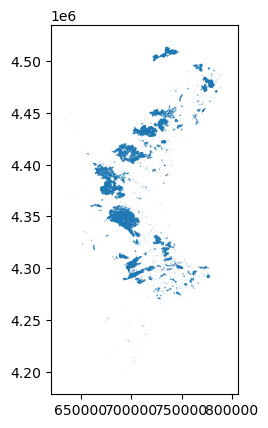

In [84]:
incendios.plot()

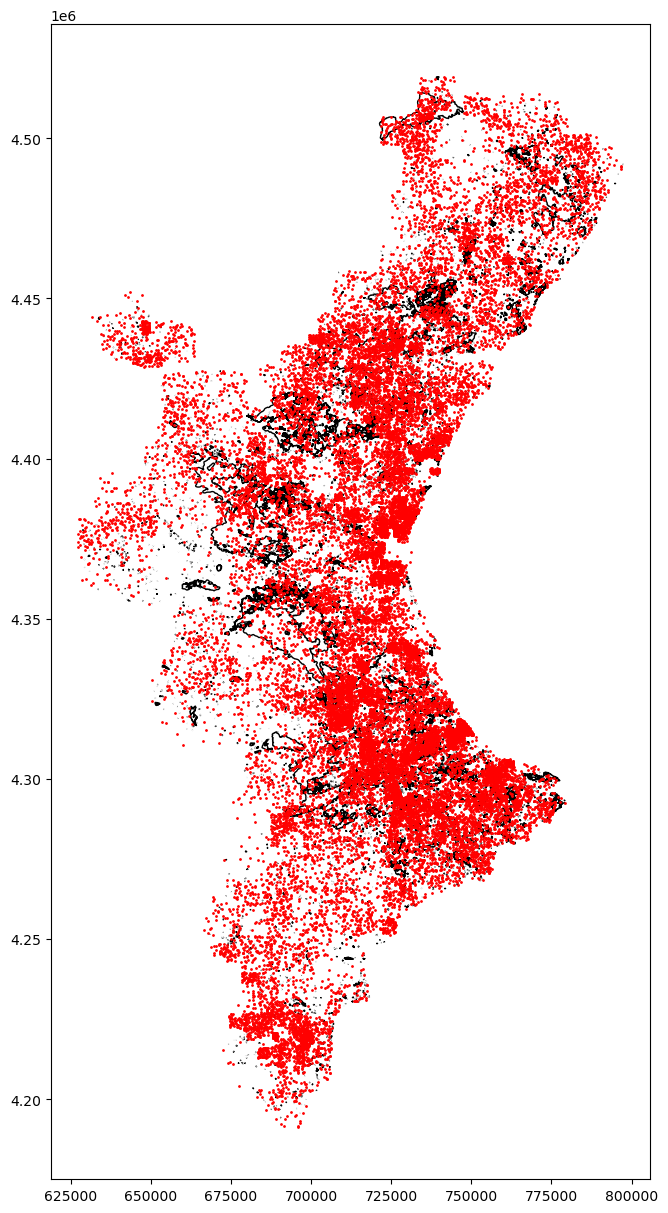

In [85]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
incendios.plot(ax=ax, color='white', edgecolor='black')
rasters_all.sample(30000).plot(ax=ax, marker='o', color='red', markersize=1, aspect=1)
plt.show()

In [29]:
rasters_sample = rasters_all.sample(30000)

In [49]:
points_within = gpd.sjoin(rasters_sample, incendios, predicate='within')
points_within

/var/folders/t1/7d5rd_ws0jn7w36r2y1h1m_40000gn/T/ipykernel_73003/2533384885.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3042
Right CRS: EPSG:4326

  points_within = gpd.sjoin(rasters_sample, incendios, predicate='within')


,x_left,y_left,altitud,pendiente,orientacion,geometry,index_right,et_id,numparte,anyo,...,s_nfor,snarblen,snarbherb,id_enp,id_enp_txt,observ,supcar_ha,shape_Leng,shape_Area,date
39656,735318.676373,4.413066e+06,354.33325,71.249270,33.106678,POINT (735318.676 4413065.681),8333,9859,2014120083,2014,...,0.0,0.0,0.0,10,Parque Natural y Natura 2000 (LICs y ZEPAs),None,177.690000,10866.784602,1.776893e+06,2014-07-20
34267,676973.855464,4.389484e+06,599.18450,31.927347,147.252930,POINT (676973.855 4389483.947),9153,10679,1994460221,1994,...,0.0,0.0,0.0,0,None,None,32756.730000,330358.617617,3.275673e+08,1994-07-05
42661,677780.860427,4.395446e+06,461.57724,19.418776,260.761200,POINT (677780.860 4395446.017),9153,10679,1994460221,1994,...,0.0,0.0,0.0,0,None,None,32756.730000,330358.617617,3.275673e+08,1994-07-05
21039,679799.808770,4.372654e+06,792.20850,8.497430,216.120860,POINT (679799.809 4372653.995),9153,10679,1994460221,1994,...,0.0,0.0,0.0,0,None,None,32756.730000,330358.617617,3.275673e+08,1994-07-05
20990,675139.808770,4.370669e+06,763.69180,15.367863,158.839630,POINT (675139.809 4370668.995),9153,10679,1994460221,1994,...,0.0,0.0,0.0,0,None,None,32756.730000,330358.617617,3.275673e+08,1994-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45538,742205.784600,4.288068e+06,785.99677,16.532280,195.077760,POINT (742205.785 4288068.082),9616,0,2018030080,2018,...,0.0,0.0,0.0,0,None,None,34.547371,9081.887420,3.454737e+05,2018-08-29
17251,735453.423692,4.328254e+06,52.56600,29.489813,138.008440,POINT (735453.424 4328253.972),2583,4107,2000460115,2000,...,0.0,0.0,0.0,0,None,None,2.000000,698.791988,1.999983e+04,2000-05-16
17251,735453.423692,4.328254e+06,52.56600,29.489813,138.008440,POINT (735453.424 4328253.972),6005,7530,2007460149,2007,...,0.0,0.0,0.0,0,None,None,4.760000,1320.633278,4.756323e+04,2007-08-21
5295,764469.213104,4.296022e+06,260.48285,4.413807,139.202770,POINT (764469.213 4296021.946),7975,9501,2012030079,2012,...,0.0,0.0,0.0,0,None,None,42.680000,3291.889369,4.267656e+05,2012-07-09


In [50]:
points_within['date']

39656   2014-07-20
34267   1994-07-05
42661   1994-07-05
21039   1994-07-05
20990   1994-07-05
           ...    
45538   2018-08-29
17251   2000-05-16
17251   2007-08-21
5295    2012-07-09
30248   1994-09-17
Name: date, Length: 4164, dtype: datetime64[ns]

In [51]:
len(points_within.index)

4164

In [52]:
rasters_sample_fire_df = rasters_sample.copy()

In [53]:
rasters_sample_fire_df['is_fire'] = rasters_sample.index.isin(points_within.index)

In [54]:
rasters_sample_fire_df

,x,y,altitud,pendiente,orientacion,geometry,is_fire
49990,766061.866438,4.282943e+06,24.97670,23.338203,289.952330,POINT (766061.866 4282942.896),False
10355,728690.203611,4.381550e+06,16.11025,0.189998,119.346790,POINT (728690.204 4381550.113),False
8154,684522.786655,4.221500e+06,361.96300,109.501590,49.677124,POINT (684522.787 4221499.584),False
51156,732660.454707,4.332414e+06,300.22000,74.958450,8.449173,POINT (732660.455 4332413.965),False
39656,735318.676373,4.413066e+06,354.33325,71.249270,33.106678,POINT (735318.676 4413065.681),True
...,...,...,...,...,...,...,...
33575,756589.803025,4.305386e+06,0.76225,0.260747,44.805790,POINT (756589.803 4305385.580),False
33129,780421.821102,4.468035e+06,542.07530,32.774220,61.852882,POINT (780421.821 4468034.822),False
51936,734811.692453,4.401332e+06,28.37500,0.949420,129.389680,POINT (734811.692 4401331.676),False
31598,726642.880232,4.409634e+06,288.31876,21.556559,293.637820,POINT (726642.880 4409633.659),False


In [55]:
rasters_sample_fire_df = rasters_sample_fire_df.merge(points_within[['date']], left_index=True, right_index=True, how='left')

In [56]:
rasters_sample_fire_df

,x,y,altitud,pendiente,orientacion,geometry,is_fire,date
0,635421.882389,4.377432e+06,858.38650,3.307040,46.159070,POINT (635421.882 4377432.085),False,NaT
2,629716.882389,4.374167e+06,803.57750,56.137790,20.440338,POINT (629716.882 4374167.085),False,NaT
4,637866.882389,4.374017e+06,821.83875,13.170104,297.585140,POINT (637866.882 4374017.085),False,NaT
7,636866.882389,4.379702e+06,849.45123,4.176286,145.870990,POINT (636866.882 4379702.085),False,NaT
9,629536.882389,4.377447e+06,739.70575,45.632885,201.478230,POINT (629536.882 4377447.085),False,NaT
...,...,...,...,...,...,...,...,...
53137,723794.305975,4.268955e+06,456.44025,30.741365,195.486540,POINT (723794.306 4268955.206),False,NaT
53138,723439.305975,4.264740e+06,302.54474,4.820012,199.030330,POINT (723439.306 4264740.206),False,NaT
53139,725909.305975,4.268665e+06,603.67773,43.613365,314.474980,POINT (725909.306 4268665.206),False,NaT
53141,727554.305975,4.260300e+06,171.72624,49.986637,170.423280,POINT (727554.306 4260300.206),False,NaT


In [57]:
rasters_sample_fire_df.to_csv('data/all/points_fire_no_fire.csv', index=False)

In [58]:
# Exportamos
rasters_sample_fire_df.to_file('data/all/points_fire_no_fire.geojson', driver='GeoJSON')